In [1]:
# L2 ADVERSARIAL PLOTS
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger
import numpy as np

In [25]:
# load in the .npz files containing the adversarial distances
data = np.load('PATH TO ADVERSARIAL DISTANCES')['l2']
#data1 = np.load('./cifar10-DDNattack/kl.npz')['l2']
#data2 = np.load('./cifar10-DDNattack/cohen.npz')['l2']
#data3 = np.load('./cifar10-DDNattack/salman.npz')['l2']
#data4 = np.load('./cifar10-DDNattack/jl.npz')['l2']

In [26]:
# only keep strictly positive distances (ignore abstained attacks or images already misclassified)
data = data[data>0]
#data1 = data1[data1>0]
#data2 = data2[data2>0]
#data3 = data3[data3>0]
#data4 = data4[data4>0]

In [27]:
# make cdf (increasing) data
x_axis = np.linspace(0,max(data).item(),1000)
data_cdf = [100*(data<x_axis[i]).sum().item()/len(data) for i in range(1000)]
#x_axis = np.linspace(0,max([max(data1).item(), max(data2).item(), max(data3).item(), max(data4).item()]), 1000)
#data1_cdf = [100*(data1<x_axis[i]).sum().item()/len(data1) for i in range(1000)]
#data2_cdf = [100*(data2<x_axis[i]).sum().item()/len(data2) for i in range(1000)]
#data3_cdf = [100*(data3<x_axis[i]).sum().item()/len(data3) for i in range(1000)]
#data4_cdf = [100*(data4<x_axis[i]).sum().item()/len(data4) for i in range(1000)]

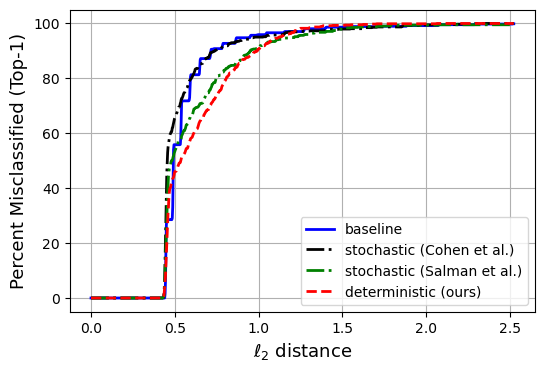

In [28]:
plt.plot(x_axis, data_cdf, label="", linewidth=2)
#plt.plot(x_axis, data1_cdf, 'b-', label="baseline", linewidth=2)
#plt.plot(x_axis, data2_cdf, 'k-.', label="stochastic (Cohen et al.)", linewidth=2)
#plt.plot(x_axis, data3_cdf, 'g-.', label="stochastic (Salman et al.)", linewidth=2)
#plt.plot(x_axis, data4_cdf, 'r--', label="deterministic (ours)", linewidth=2)
#plt.xscale('log')
plt.grid(True)
plt.legend(prop={'size': 10})
plt.xlabel("$\ell_2$ distance", fontsize=13)
plt.ylabel("Percent Misclassified (Top-1)", fontsize=13)
plt.savefig('./cifar10-DDNattack/ddn_adv_plot.png',bbox_inches='tight')
plt.show()